In [15]:
!pip install -U gym

In [10]:
import gym
env = gym.make('MountainCar-v0')

/Users/caydengwee/Coding/.virtualenvs/rl-tutorial/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [6]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
The action space: Discrete(3)


In [3]:
env.reset()
env.render(mode = "human")



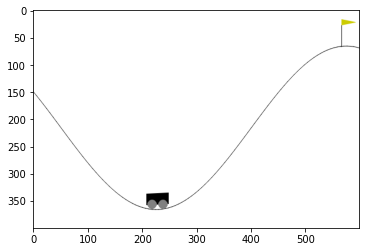

In [7]:
env.reset()

env_screen = env.render(mode = 'rgb_array')
env.close()

import matplotlib.pyplot as plt 
plt.imshow(env_screen)

In [13]:
import time 

# env.render(mode = "human")

# Number of steps you run the agent for 
num_steps = 1500

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    # time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

KeyboardInterrupt: 

In [1]:
!pip install --upgrade pip setuptools wheel
!pip install opencv-python
!pip install gym\[atari\]
!pip install autorom\[accept-rom-license\]
!pip install ale-py



In [2]:
import gym
import time 
env = gym.make("ALE/Breakout-v5" , render_mode="human")

print("Observation Space: ", env.observation_space)
print("Action Space       ", env.action_space)


obs = env.reset()

for i in range(1000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    # env.render()
    time.sleep(0.01)
print("done..??")
env.close()

Observation Space:  Box(0, 255, (210, 160, 3), uint8)
Action Space        Discrete(4)
done..??


In [4]:
from collections import deque
from gym import spaces
import numpy as np

class ConcatObs(gym.Wrapper):
    def __init__(self, env, k):
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = \
            spaces.Box(low=0, high=255, shape=((k,) + shp), dtype=env.observation_space.dtype)


    def reset(self):
        ob = self.env.reset()
        for _ in range(self.k):
            self.frames.append(ob)
        return self._get_ob()

    def step(self, action):
        ob, reward, done, info = self.env.step(action)
        self.frames.append(ob)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        return np.array(self.frames)

In [5]:
env = gym.make("BreakoutNoFrameskip-v4", render_mode="human")
wrapped_env = ConcatObs(env, 4)
print("The new observation space is", wrapped_env.observation_space)

The new observation space is Box(0, 255, (4, 210, 160, 3), uint8)


/Users/caydengwee/Coding/.virtualenvs/rl-tutorial/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


In [6]:
# Reset the Env
obs = wrapped_env.reset()
print("Intial obs is of the shape", obs.shape)

# Take one step
obs, _, _, _  = wrapped_env.step(2)
print("Obs after taking a step is", obs.shape)

Intial obs is of the shape (4, 210, 160, 3)
Obs after taking a step is (4, 210, 160, 3)


In [7]:
import random 

class ObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def observation(self, obs):
        # Normalise observation by 255
        return obs / 255.0

class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        # Clip reward between 0 to 1
        return np.clip(reward, 0, 1)
    
class ActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def action(self, action):
        if action == 3:
            return random.choice([0,1,2])
        else:
            return action

In [8]:
env = gym.make("BreakoutNoFrameskip-v4", render_mode="human")
wrapped_env = ObservationWrapper(RewardWrapper(ActionWrapper(env)))

obs = wrapped_env.reset()

for step in range(500):
    action = wrapped_env.action_space.sample()
    obs, reward, done, info = wrapped_env.step(action)
    
    # Raise a flag if values have not been vectorised properly
    if (obs > 1.0).any() or (obs < 0.0).any():
        print("Max and min value of observations out of range")
    
    # Raise a flag if reward has not been clipped.
    if reward < 0.0 or reward > 1.0:
        assert False, "Reward out of bounds"
    
    # Check the rendering if the slider moves to the left.
    # wrapped_env.render()
    
    time.sleep(0.001)

wrapped_env.close()

print("All checks passed")

/Users/caydengwee/Coding/.virtualenvs/rl-tutorial/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


All checks passed


In [9]:
print("Wrapped Env:", wrapped_env)
print("Unwrapped Env", wrapped_env.unwrapped)
print("Getting the meaning of actions", wrapped_env.unwrapped.get_action_meanings())

Wrapped Env: <ObservationWrapper<RewardWrapper<ActionWrapper<TimeLimit<OrderEnforcing<PassiveEnvChecker<AtariEnv<BreakoutNoFrameskip-v4>>>>>>>>
Unwrapped Env <AtariEnv<BreakoutNoFrameskip-v4>>
Getting the meaning of actions ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


hello


# Installing Baselines

In [8]:
!git clone https://github.com/openai/baselines

# !pip install -r requirements.txt


fatal: destination path 'baselines' already exists and is not an empty directory.
Obtaining file:///Users/caydengwee/Coding/Academics/term-8/ai-project
ERROR: file:///Users/caydengwee/Coding/Academics/term-8/ai-project does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [14]:
!pwd
!cd baselines;pip install -e .
!pwd


/Users/caydengwee/Coding/Academics/term-8/ai-project
Obtaining file:///Users/caydengwee/Coding/Academics/term-8/ai-project/baselines
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      running egg_info
      creating /private/var/folders/fs/_7tjrf4s5738mf0qpvn137sm0000gn/T/pip-pip-egg-info-quaoxtyd/baselines.egg-info
      writing /private/var/folders/fs/_7tjrf4s5738mf0qpvn137sm0000gn/T/pip-pip-egg-info-quaoxtyd/baselines.egg-info/PKG-INFO
      writing dependency_links to /private/var/folders/fs/_7tjrf4s5738mf0qpvn137sm0000gn/T/pip-pip-egg-info-quaoxtyd/baselines.egg-info/dependency_links.txt
      writing requirements to /private/var/folders/fs/_7tjrf4s5738mf0qpvn137sm0000gn/T/pip-pip-egg-info-quaoxtyd/baselines.egg-info/requires.txt
      writing top-level names to /private/var/folders/fs/_7tjrf4s5738mf0qpvn137sm0000gn/T/pip-pip-egg-info-quaoxtyd/ba